<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [11]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [31]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


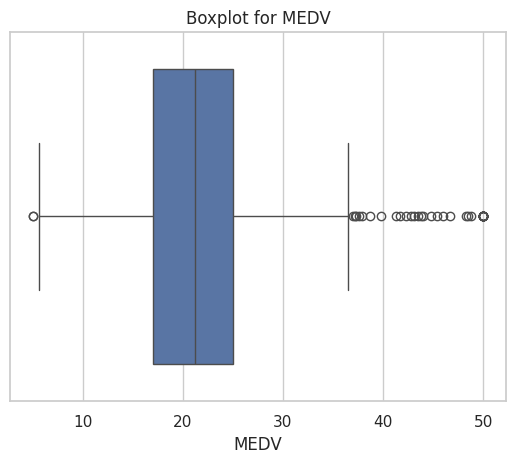

In [14]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(x="MEDV",data = boston_df)
plt.title("Boxplot for MEDV")
plt.show()

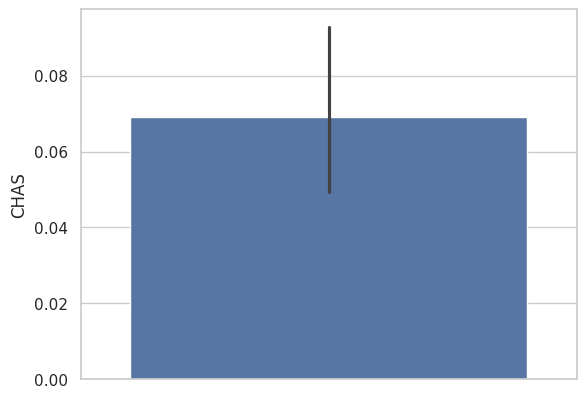

In [35]:
#barplot for charles river variable
sns.set(style="whitegrid")
ax = sns.barplot(y="CHAS",data=boston_df)
plt.show()

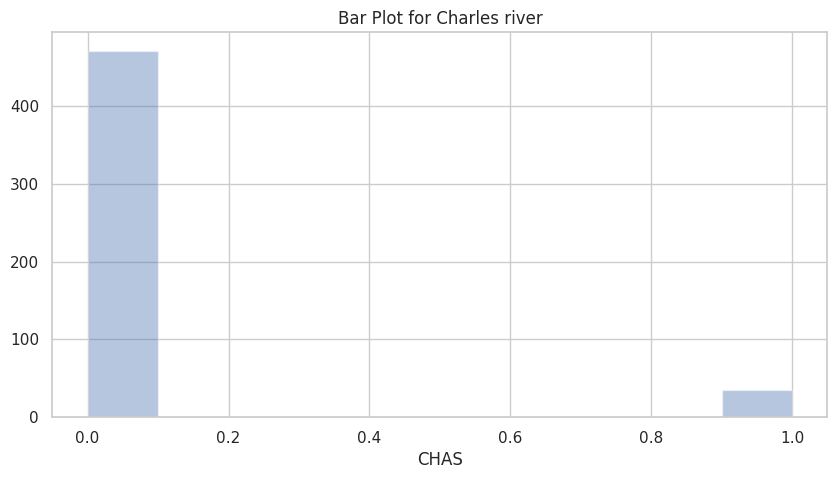

In [67]:
#Provide a barplot for the Charles river variable
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Bar Plot for Charles river")
plt.show()


In [50]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

In [51]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


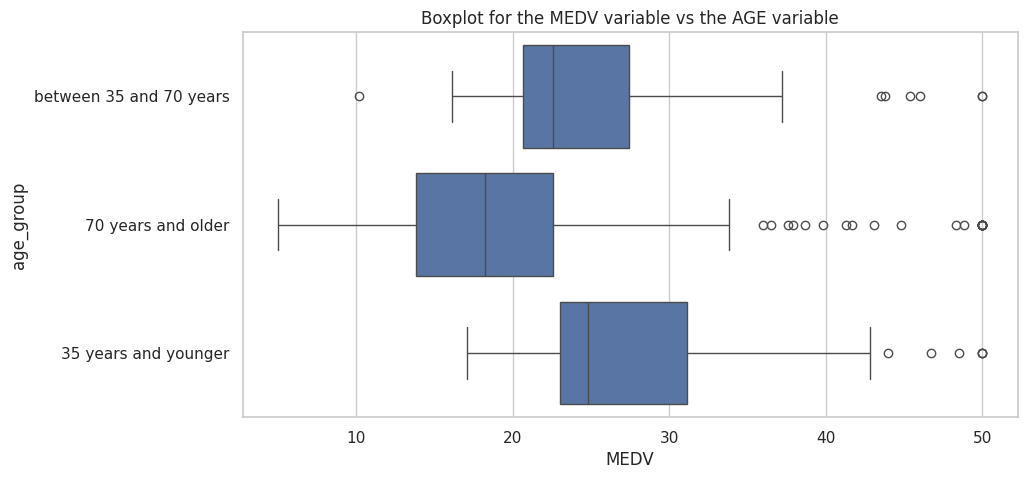

In [58]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x="MEDV",y="age_group",data = boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

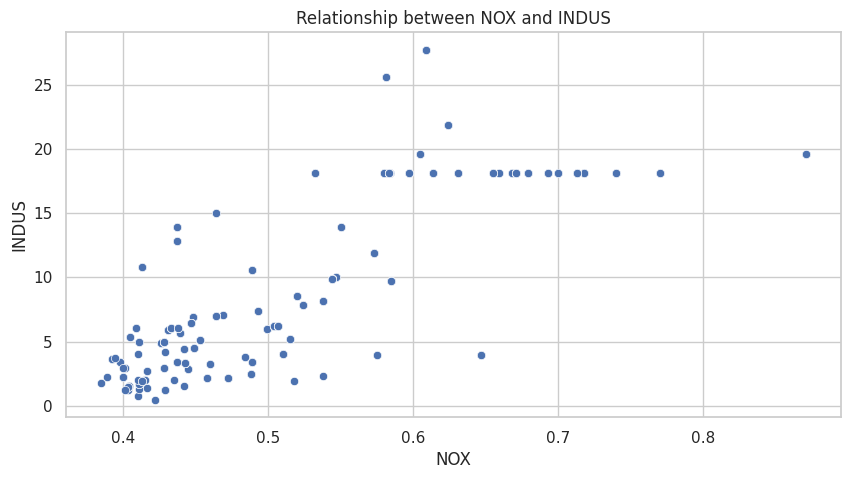

In [59]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and 
#the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

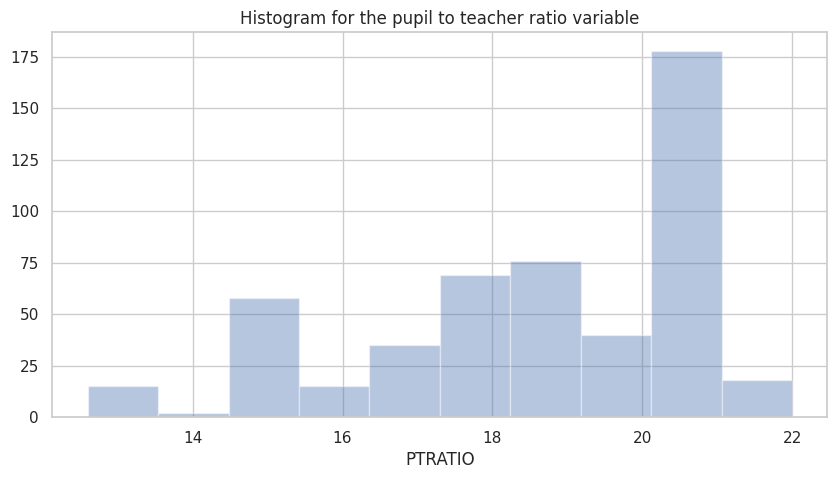

In [64]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

In [15]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)
#Null Hypothesis (H0): Both average MEDV are the same
#Alternative Hypothesis(H1):Both average MEDV are NOT the same

boston_df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [17]:
a = boston_df[boston_df["CHAS"]==0]["MEDV"]
a

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
30     12.7
31     14.5
32     13.2
33     13.1
34     13.5
35     18.9
36     20.0
37     21.0
38     24.7
39     30.8
40     34.9
41     26.6
42     25.3
43     24.7
44     21.2
45     19.3
46     20.0
47     16.6
48     14.4
49     19.4
50     19.7
51     20.5
52     25.0
53     23.4
54     18.9
55     35.4
56     24.7
57     31.6
58     23.3
59     19.6
60     18.7
61     16.0
62     22.2
63     25.0
64     33.0
65     23.5
66     19.4
67     22.0
68     17.4
69     20.9
70     24.2
71     21.7
72     22.8
73     23.4
74     24.1
75     21.4
76     20.0
77     20.8
78     21.2
79     20.3
80     28.0
81     23.9
82     24.8
83  

In [18]:
b = boston_df[boston_df["CHAS"]==1]["MEDV"]
b

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [19]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)
#Since p-value is more than 0.05, we failed to reject null hypothesis since there si NO statistical Significance

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [31]:
#Is there a difference in Median values of houses(MEDV) for each proportion of owner occupied units built prior 
#to 1940(AGE)
#ANOVA 
boston_df["AGE"].value_counts()

100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
98.8      4
87.9      4
95.6      3
97.0      3
21.4      3
36.6      3
98.9      3
32.2      3
97.3      3
97.4      3
92.6      3
96.2      3
94.1      3
88.0      3
76.5      3
41.1      2
96.7      2
88.4      2
84.1      2
82.6      2
34.5      2
18.5      2
92.9      2
91.2      2
91.9      2
90.0      2
86.5      2
85.4      2
59.7      2
79.9      2
28.9      2
53.6      2
91.0      2
54.3      2
94.5      2
70.4      2
61.5      2
83.0      2
82.5      2
90.8      2
76.7      2
88.5      2
32.0      2
94.6      2
79.2      2
18.4      2
52.3      2
91.8      2
93.9      2
27.7      2
94.7      2
31.9      2
7.8       2
85.1      2
93.8      2
93.6      2
92.4      2
98.4      2
77.7      2
80.8      2
93.3      2
65.2      2
17.5      2
58.7      2
95.3      2
21.9      2
96.6      2
6.6       2
47.2      2
82.9      2
94.3      2
98.1      2
70.6      2
96.1      2
95.0      2
31.1      2
87.3      2
98.3      2
45.8

In [25]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

In [26]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
5,5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
6,6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
7,7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older
8,8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years and older
9,9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years and older


In [28]:
#Stating the Hypothesis
#Null Hypothesis (H0): The three population means are equal
#Alternative Hypothesis(H1): Atleast one of the means differ 
low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

In [29]:
f_stats, p_value = scipy.stats.f_oneway(low,mid,high,axis=0)

In [30]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))
#Since p-value more than alpha value of 0.05, we failed to reject null hypothesis since there is NO statistical significance.

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


In [33]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#Pearson Correlation
#Stating the Hypothesis
#Null Hypothesis (H0): NOX is not correlated with INDUS
#Alternative Hypothesis (H1): NOX is correlated with INDUS
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

In [36]:
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))
#Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric Oxide and 
#non-retail business acres per town.

Pearson Coefficient value=0.7636514469209192, P-value=7.913361061210442e-98


In [37]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
#Regression Analysis
#Stating the Hypothesis
#Null Hypothesis (H0): weighted distances to five Boston employment centres are not related to median value
#Alternative Hypothesis (H1): weighted distances to five Boston employment centres are related to median value
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'age_group'], dtype='object')

In [40]:
y = boston_df['MEDV']
x = boston_df['DIS']

In [41]:
x = sm.add_constant(x)

In [42]:
results = sm.OLS(y,x).fit()

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        19:02:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#Pearson Coeffiecent value
np.sqrt(0.062)  
#The square root of R-squared is 0.25, which implies weak correlation between both features

0.24899799195977465